In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import torch
import librosa
import pickle
import torch.nn as nn

In [16]:
loaded_state = torch.load('/workspace/voxceleb_trainer/exps/exp20/model/model000000136.model')

In [ ]:
from 

In [17]:
loaded_state

OrderedDict([('__S__.module.conv1.weight',
              tensor([[[[ 1.4008e-02, -7.6831e-02, -8.6850e-02],
                        [-3.2478e-02, -1.3359e-01, -2.1028e-01],
                        [ 3.8945e-02,  1.3213e-01,  3.5860e-01]]],
              
              
                      [[[ 2.2701e-02,  5.5331e-02, -3.7129e-03],
                        [-4.8081e-02,  3.1561e-02, -3.6380e-02],
                        [-5.9661e-03,  1.2876e-01,  4.6875e-02]]],
              
              
                      [[[ 7.1598e-04,  8.4493e-03,  2.9709e-03],
                        [-1.1274e-02,  6.1004e-04,  1.6832e-03],
                        [ 2.3776e-03,  1.6082e-03, -1.6527e-02]]],
              
              
                      [[[-5.4386e-03, -3.0186e-03,  2.8564e-05],
                        [-1.0470e-02, -3.2940e-03, -2.5243e-03],
                        [ 2.7072e-04, -1.8113e-03, -4.5624e-03]]],
              
              
                      [[[-3.4892e-43,  8.6810e-42

In [228]:
a = [1, '2', 3]

In [230]:
set(a)

{1, '2', 3}

In [223]:
with open('/workspace/DATASET/server9_ssd/STD_SRE_EGS/FB/44_3', 'rb') as handle:
    a = pickle.load(handle)

In [113]:
a[0].shape

(1, 400, 40)

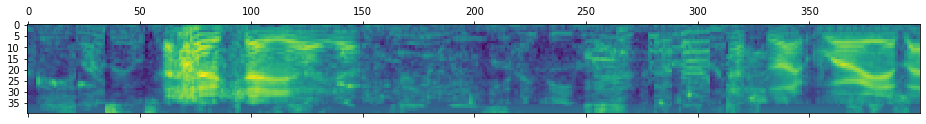

In [224]:
plt.matshow(a[0][0].astype(np.float32).T)

In [8]:
utt_dir = '/workspace/DATASET/server9/SRE18_TEST/Eval/aaaeuhnc_sre18.wav'
concat_wav, g = librosa.load(utt_dir, sr=4000)
print(g)

4000


In [9]:
len(concat_wav)

431721

In [11]:
utt_dir = '/workspace/DATASET/server9/SRE18_TEST/Eval/aaaeuhnc_sre18.wav'
concat_wav, g = librosa.load(utt_dir)
print(g)

22050


In [6]:
utt_dir = '/workspace/DATASET/server9/SRE18_TEST/Eval/aaaeuhnc_sre18.wav'
concat_wav, g = librosa.load(utt_dir, sr=8000)
print(g)

8000


In [7]:
len(concat_wav)

863441

In [4]:
utt_dir = '/workspace/DATASET/server9/SRE18_TEST/Eval/aaaeuhnc_sre18.wav'
concat_wav, g = librosa.load(utt_dir, sr=16000)
print(g)

16000


In [5]:
len(concat_wav)

1726882

In [28]:
concat_wav.shape

(863441,)

In [93]:
concat_wav, _ = librosa.load(utt_dir, sr=16000)

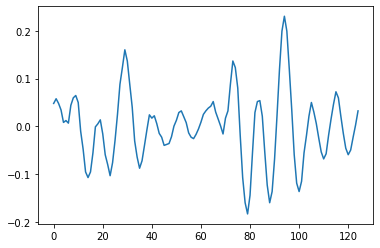

In [99]:
plt.plot(concat_wav[1000:1125])

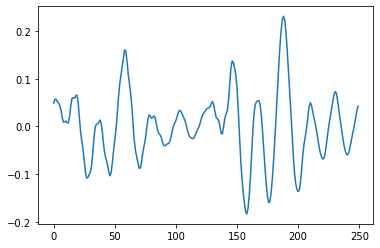

In [97]:
plt.plot(concat_wav[2000:2250])

In [20]:
concat_wav.shape

(1726882,)

In [17]:
concat_wav.shape

(863441,)

In [77]:
single_feats_Mel = librosa.feature.melspectrogram(y=concat_wav, \
n_fft=512, hop_length=160, \
win_length=None, window='hann', power=2.0, \
center=True, pad_mode='reflect', n_mels=40, \
fmin=20, fmax=32000)
single_feats_LogMelFB = librosa.power_to_db(single_feats_Mel)

In [82]:
single_feats_Mel = librosa.feature.melspectrogram(y=concat_wav, \
n_fft=512, hop_length=160, \
win_length=None, window='hann', power=2.0, \
center=True, pad_mode='reflect', n_mels=40, \
fmin=20, fmax=2000)
single_feats_LogMelFB = librosa.power_to_db(single_feats_Mel)

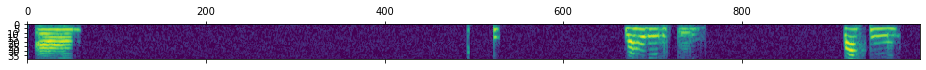

In [83]:
plt.matshow(single_feats_LogMelFB[:, :1000])

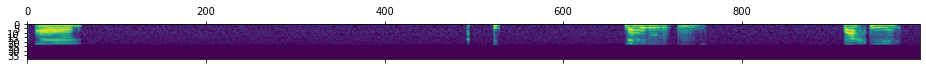

In [78]:
plt.matshow(single_feats_LogMelFB[:, :1000])

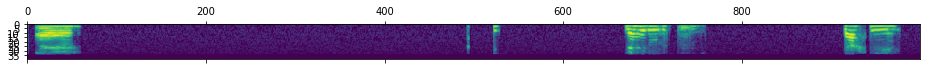

In [74]:
plt.matshow(single_feats_LogMelFB[:, :1000])

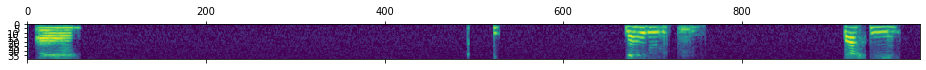

In [72]:
plt.matshow(single_feats_LogMelFB[:, :1000])

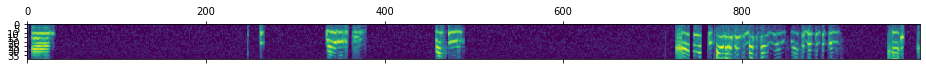

In [69]:
plt.matshow(single_feats_LogMelFB[:, :1000])

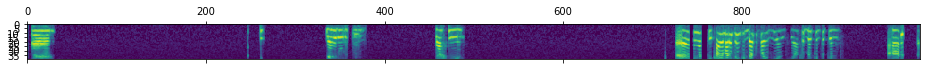

In [37]:
plt.matshow(single_feats_LogMelFB[:, :1000])

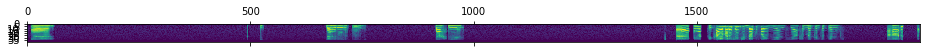

In [47]:
plt.matshow(single_feats_LogMelFB[:, :2000])

In [ ]:
concat_wav, _ = librosa.load(utt_dir, sr=self.sr)

VAD_result = self._VAD_detection(concat_wav)
VAD_result_wav = self._VAD_detection2wav(VAD_result, concat_wav)

aug_wav = concat_wav

# Raw wave
# Apply VAD
assert aug_wav.shape[0] == VAD_result_wav.shape[0]
out_wav = aug_wav[VAD_result_wav.astype(np.bool)]
batched_feats_rawwave = out_wav[None, :]

single_feats_Mel = librosa.feature.melspectrogram(y=aug_wav, \
n_fft=512, hop_length=160, \
win_length=None, window='hann', power=2.0, \
center=True, pad_mode='reflect', n_mels=self.mels, \
fmin=20, fmax=7600)
single_feats_LogMelFB = librosa.power_to_db(single_feats_Mel)

# LogMelFB
# Note single_feats needs transpose
out_feats = self._CMVN(single_feats_LogMelFB.T, cmn_window = 300, normalize_variance = False)
# Apply VAD
assert out_feats.shape[0] == VAD_result.shape[0]
out_feats = out_feats[VAD_result.astype(np.bool)]

batched_feats_LogMelFB = out_feats[None, :, :]

single_feats_MFCC = librosa.feature.mfcc(S=single_feats_LogMelFB, sr=self.sr, n_mfcc=self.mfcc_dim, \
dct_type=2, n_fft=512, hop_length=160, \
win_length=None, window='hann', power=2.0, \
center=True, pad_mode='reflect', n_mels=self.mels, \
fmin=20, fmax=7600)

# MFCC
# Note single_feats needs transpose
out_feats = self._CMVN(single_feats_MFCC.T, cmn_window = 300, normalize_variance = False)
# Apply VAD
assert out_feats.shape[0] == VAD_result.shape[0]
out_feats = out_feats[VAD_result.astype(np.bool)]

batched_feats_MFCC = out_feats[None, :, :]

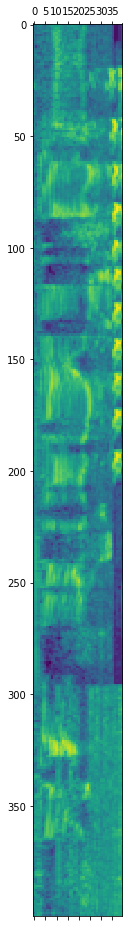

In [8]:
plt.matshow(a[0][0].astype(np.float32)[0:1000])

In [30]:
a = nn.Linear(5, 10, bias=True)

In [51]:
head1 = torch.nn.Sequential()
head1.add_module('linear1', nn.Linear(5, 10, bias=True))
head1.add_module('relu', nn.ReLU(True))
head1.add_module('linear2', nn.Linear(10, 1, bias=True))
head1.add_module('softmax', nn.Softmax(dim=1))

In [73]:
b = torch.randn([2, 3, 5])

In [44]:
head1.linear2.weight

Parameter containing:
tensor([[-0.2876, -0.0557,  0.0829,  0.1119, -0.0607,  0.2041, -0.2552, -0.1271,
         -0.0990, -0.2160]], requires_grad=True)

In [ ]:
*head1(b)

In [59]:
head1(b) * b

tensor([[[-0.4105,  0.8207,  0.5668,  0.4706,  0.4873],
         [-0.3664, -0.2213,  0.0725,  0.2813,  0.5958],
         [-0.3712,  0.1441, -0.2788, -0.1856, -0.0020]],

        [[ 0.0212,  0.1038,  0.3107, -0.0164, -0.1364],
         [ 0.4642, -0.0266,  0.7028, -0.1625, -0.4167],
         [-0.1738,  0.5443, -0.4798, -0.1678,  0.5701]]],
       grad_fn=<MulBackward0>)

In [80]:
a = torch.sum(head1(b) * b, axis=1)

In [81]:
torch.cat((a, a), dim=1)

tensor([[ 0.4988, -0.0718,  0.1037,  0.3284,  1.2972,  0.4988, -0.0718,  0.1037,
          0.3284,  1.2972],
        [ 0.4140,  0.0882, -0.8396,  0.4428, -1.0577,  0.4140,  0.0882, -0.8396,
          0.4428, -1.0577]], grad_fn=<CatBackward>)

In [60]:
b

tensor([[[-1.0748,  2.1489,  1.4841,  1.2321,  1.2759],
         [-1.0866, -0.6564,  0.2151,  0.8342,  1.7671],
         [-1.3216,  0.5130, -0.9928, -0.6607, -0.0071]],

        [[ 0.0615,  0.3010,  0.9008, -0.0476, -0.3955],
         [ 1.3409, -0.0767,  2.0299, -0.4694, -1.2037],
         [-0.5626,  1.7624, -1.5536, -0.5433,  1.8458]]])

In [69]:
softmax = nn.Softmax(dim = 1)

In [72]:
b1 = softmax(b)
print(b1)

tensor([[[0.3611, 0.7966, 0.7325, 0.5487, 0.3435],
         [0.3568, 0.0482, 0.2059, 0.3686, 0.5613],
         [0.2821, 0.1552, 0.0615, 0.0827, 0.0952]],

        [[0.1949, 0.1667, 0.2393, 0.4415, 0.0922],
         [0.7007, 0.1143, 0.7401, 0.2895, 0.0411],
         [0.1044, 0.7190, 0.0206, 0.2689, 0.8668]]])


In [76]:
b2

tensor([[[0.0926, 0.0308, 0.2758, 0.2222, 0.5721],
         [0.0950, 0.9146, 0.0697, 0.7353, 0.3829],
         [0.8124, 0.0546, 0.6546, 0.0426, 0.0450]],

        [[0.0930, 0.2453, 0.2552, 0.2506, 0.3547],
         [0.5178, 0.6916, 0.5242, 0.4496, 0.4533],
         [0.3892, 0.0631, 0.2206, 0.2998, 0.1920]]])

In [74]:
b2 = softmax(b)
print(b2)

tensor([[[0.0926, 0.0308, 0.2758, 0.2222, 0.5721],
         [0.0950, 0.9146, 0.0697, 0.7353, 0.3829],
         [0.8124, 0.0546, 0.6546, 0.0426, 0.0450]],

        [[0.0930, 0.2453, 0.2552, 0.2506, 0.3547],
         [0.5178, 0.6916, 0.5242, 0.4496, 0.4533],
         [0.3892, 0.0631, 0.2206, 0.2998, 0.1920]]])


In [66]:
-0.6564 * 0.3372

-0.22133808

In [61]:
head1(b)

tensor([[[0.3819],
         [0.3372],
         [0.2809]],

        [[0.3449],
         [0.3462],
         [0.3089]]], grad_fn=<SoftmaxBackward>)

In [58]:
b * head1(b)

tensor([[[-0.4105,  0.8207,  0.5668,  0.4706,  0.4873],
         [-0.3664, -0.2213,  0.0725,  0.2813,  0.5958],
         [-0.3712,  0.1441, -0.2788, -0.1856, -0.0020]],

        [[ 0.0212,  0.1038,  0.3107, -0.0164, -0.1364],
         [ 0.4642, -0.0266,  0.7028, -0.1625, -0.4167],
         [-0.1738,  0.5443, -0.4798, -0.1678,  0.5701]]],
       grad_fn=<MulBackward0>)

In [45]:
b.shape

torch.Size([2, 10, 5])

In [31]:
a.bias

Parameter containing:
tensor([ 0.3652,  0.2517,  0.3244, -0.1886,  0.2086,  0.0573,  0.3886,  0.1174,
         0.2293,  0.1861], requires_grad=True)

In [12]:
b = torch.ones([2, 10, 5])

In [20]:
b

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [27]:
a.weight

Parameter containing:
tensor([[-0.1341,  0.2025,  0.3342,  0.3747,  0.3006],
        [ 0.4020, -0.0045,  0.2592, -0.2630, -0.3888],
        [ 0.2432, -0.3116,  0.0576,  0.0536, -0.0867],
        [-0.0708,  0.3249,  0.3962,  0.0370, -0.4453],
        [-0.0898, -0.3703,  0.0681, -0.0114,  0.4276],
        [-0.1574,  0.0969, -0.2735, -0.2383, -0.1932],
        [-0.0170,  0.3626,  0.1223, -0.1428,  0.0982],
        [-0.2529, -0.1796, -0.1650,  0.2945,  0.1093],
        [ 0.2483, -0.0791, -0.4408,  0.2228,  0.1032],
        [ 0.1750,  0.0738, -0.1776,  0.2872,  0.1314]], requires_grad=True)

In [22]:
a(b)

tensor([[[ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
         [ 1.0779,  0.0049, -0.0439,  0.2419,  0.0241, -0.7656,  0.4233,
          -0.1938,  0.0544,  0.4898],
 

In [22]:
a = torch.randn(3, 2)

In [23]:
m = torch.nn.LogSoftmax(dim=1)

In [30]:
m_1 = torch.nn.Softmax(dim=1)

In [27]:
k = m(a)

In [29]:
a

tensor([[-0.0149, -0.6499],
        [-0.6531, -1.7675],
        [ 1.4938,  0.3274]])

In [43]:
k

tensor([[-0.4253, -1.0602],
        [-0.2838, -1.3981],
        [-0.2712, -1.4376]])

In [17]:
y = torch.tensor([0, 1, 0])

In [21]:
y.dtype

torch.int64

In [40]:
z = torch.ones(k.size()) * 0.0

In [41]:
for i, j in zip(z, y):
    i[j] = 1.0

In [42]:
z

tensor([[1., 0.],
        [0., 1.],
        [1., 0.]])

In [62]:
g[0, 0] = 0.0

In [63]:
g

tensor([[ 0.0000, -1.0602],
        [-0.2838, -1.3981],
        [-0.2712, -1.4376]], device='cuda:0')

In [61]:
g = k.cuda()

In [44]:
out = k*z

In [52]:
y.size()

torch.Size([3])

In [48]:
- torch.sum(out) / y.size(0)

tensor(-0.6982)

In [49]:
m_1 = torch.nn.CrossEntropyLoss()

In [50]:
m_1(a, y)

tensor(0.6982)

In [2]:
PROJECT_ROOT = '/workspace/GREAT_ASV_system/'
sys.path.append(PROJECT_ROOT)
PROJECT_ROOT = '/workspace/GREAT_ASV_system/train'
sys.path.append(PROJECT_ROOT)

In [32]:
from train.models.Resnet_plus import ResNet, ResNet_ASV

In [33]:
a = ResNet_ASV()

In [35]:
test = list(a.modules())

In [47]:
test[0]

ResNet_ASV(
  (backbone): ResNet(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (1): BasicBlock(
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [3]:
from train.models.resnest_torch import *

In [3]:
from train import models

In [3]:
from train.models import *

In [3]:
from train.models.large_margin_clf import AMSoftmax_normfree

In [4]:
a = ResNet_ASV()

In [5]:
ip = torch.randn([3, 300, 40])

In [6]:
a(ip, None).shape

torch.Size([3, 256, 5, 38])


torch.Size([3, 256])

In [215]:
opt = torch.optim.SGD(a.parameters(), lr=0.01)

In [216]:
lr = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt, 10, T_mult=2, eta_min=1e-4, last_epoch=-1)

In [246]:
lr.step()
print(opt.param_groups[0]['lr'])

0.01


In [5]:
a.backbone.layer4[0]

BasicBlock(
  (downsample): Sequential(
    (0): AvgPool2d(kernel_size=[2, 2], stride=2, padding=0)
    (1): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [14]:
a.embedding_layer1.linear.weight

Parameter containing:
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], requires_grad=True)

In [4]:
dir()

['AMSoftmax',
 'AMSoftmax_normfree',
 'AM_normfree_softmax_anneal_ce_SycnBN',
 'AM_normfree_softmax_anneal_ce_head',
 'AM_normfree_softmax_anneal_inter_ce_head',
 'AM_softmax_anneal_ce_head',
 'DataParallelWithCallback',
 'F',
 'In',
 'Linear_softmax_ce_head',
 'Out',
 'PROJECT_ROOT',
 'ResNet_ASV',
 'Resnet_ASV',
 'Resnet_ASV_large_margin_annealing',
 'SynchronizedBatchNorm1d',
 'SynchronizedBatchNorm2d',
 'SynchronizedBatchNorm3d',
 'Xvector',
 'Xvector_1L_selfatt',
 'Xvector_SAP',
 'Xvector_SAP_1L',
 'Xvector_SAP_nodilate_1L',
 'Xvector_nodilate_1L_selfatt',
 'Xvector_nodilate_selfatt',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'batchnorm',
 'comm',
 'convert_model',
 'exit',
 'get_ipython',
 'large_margin_clf',
 'librosa',
 'nn',
 'np',
 'os',
 'patch_replication_callback',
 'patch_sync_batchnorm',
 'pickle',
 'plt',
 'qui

In [5]:
ResNet50_SAP_T?

In [4]:
dir()

['AMSoftmax_normfree',
 'AM_normfree_softmax_anneal_ce_head',
 'BasicBlock',
 'Bottleneck',
 'F',
 'In',
 'Out',
 'PROJECT_ROOT',
 'ResNet',
 'ResNet50_SAP_T',
 'Resnet50',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'ablation',
 'exit',
 'get_ipython',
 'librosa',
 'nn',
 'np',
 'os',
 'pickle',
 'plt',
 'quit',
 'resnest',
 'resnest101',
 'resnest200',
 'resnest269',
 'resnest50',
 'resnest50_fast_1s1x64d',
 'resnest50_fast_1s2x40d',
 'resnest50_fast_1s4x24d',
 'resnest50_fast_2s1x64d',
 'resnest50_fast_2s2x40d',
 'resnest50_fast_4s1x64d',
 'resnest50_fast_4s2x40d',
 'resnest_torch',
 'resnet',
 'splat',
 'sys',
 'torch']

In [3]:
dir()

['In',
 'Out',
 'PROJECT_ROOT',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'librosa',
 'np',
 'os',
 'pickle',
 'plt',
 'quit',
 'sys',
 'torch']

In [6]:
models.ResNet50_SAP_T?

In [5]:
Resnet50.ResNet50_SAP_T?

Object `Resnet50.ResNet50_SAP_T` not found.


In [4]:
Xvector?

Object `Xvector` not found.


In [6]:
resnest_torch?

In [7]:
models.resnest_torch?

In [18]:
models.ablation?

In [6]:
FOCAL_ALDA?

Object `FOCAL_ALDA` not found.


In [16]:
models.splat?

In [10]:
ablation?

Object `ablation` not found.


In [23]:
resnest50?

Object `resnest50` not found.


In [8]:
models.resnest50?

Object `models.resnest50` not found.


In [5]:
Xvector?

Object `Xvector` not found.


In [14]:
models.resnest50?

In [52]:
standard_freq_logging?

In [4]:
from preprocessing.Utils.preprocessing_3type import ThreeTypes_IterableDataset

In [5]:
OPT_INDEX = '/workspace/DATASET/server1/dataset'
data_dir_dict = {}

# train
data_dir_dict['spk2utt_train_dict'] = os.path.join(OPT_INDEX, 'spk2utt_train_dict')
data_dir_dict['music_dict'] = os.path.join(OPT_INDEX, 'music_dict')
data_dir_dict['noise_dict'] = os.path.join(OPT_INDEX, 'noise_dict')
data_dir_dict['babble_dict'] = os.path.join(OPT_INDEX, 'babble_dict')
data_dir_dict['rir_dict'] = os.path.join(OPT_INDEX, 'rir_dict')

In [6]:
data_len_dict = {}

data_len_dict['spk2utt_train_len'] = os.path.join(OPT_INDEX, 'spk2utt_train_len')
data_len_dict['music_len'] = os.path.join(OPT_INDEX, 'music_len')
data_len_dict['noise_len'] = os.path.join(OPT_INDEX, 'noise_len')
data_len_dict['babble_len'] = os.path.join(OPT_INDEX, 'babble_len')

In [7]:
config = {}

config['sr'] = 16000
config['repeats'] = 1
config['batch_size'] = 1

In [8]:
dataset = ThreeTypes_IterableDataset(config, data_dir_dict, data_len_dict)

In [9]:
dataset.get_random_list()

In [21]:
vad, raw, wav, fb, mfcc, lab = next(dataset)

a True
noise 4


In [13]:
wav.shape

(1, 63840)

In [22]:
raw.shape

(79840,)

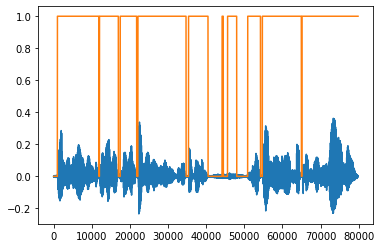

In [11]:
plt.plot(raw)
plt.plot(vad)

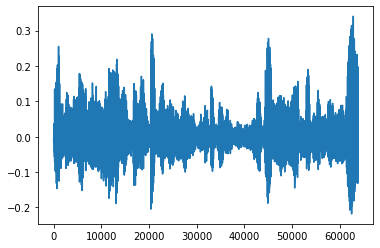

In [14]:
plt.plot(wav[0])

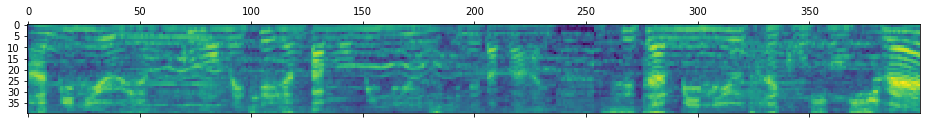

In [15]:
plt.matshow(fb[0].T)

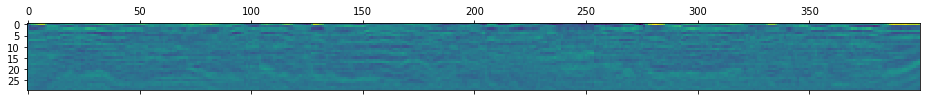

In [16]:
plt.matshow(mfcc[0].T)